In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 0. Data exploration: unit root tests

### Data loading

In [4]:
test_folders = ['../dataset/eurusd', '../dataset/gbpusd', '../dataset/audusd']

In [5]:
cols = ['timestamp',  'open_bid', 'high_bid', 'low_bid', 'close_bid', 'volume']
df = {}
f = pd.DataFrame(columns=cols)
print("Loading...")
for folder in test_folders:
    files = os.listdir(folder)
    for file in files:
        if file.endswith(".csv"):
            print(file)
            tmp = pd.read_csv(os.path.join(folder, file), delimiter=';', header=0, names=cols)
            f = pd.concat([f, tmp], ignore_index=True)
    df[folder] = f.copy()
print("Complted.")

Loading...
DAT_ASCII_EURUSD_M1_201905.csv
DAT_ASCII_EURUSD_M1_201904.csv
DAT_ASCII_EURUSD_M1_201906.csv
DAT_ASCII_EURUSD_M1_201903.csv
DAT_ASCII_EURUSD_M1_201902.csv
DAT_ASCII_EURUSD_M1_201901.csv
DAT_ASCII_EURUSD_M1_2018.csv
DAT_ASCII_EURUSD_M1_2009.csv
DAT_ASCII_EURUSD_M1_2011.csv
DAT_ASCII_EURUSD_M1_2010.csv
DAT_ASCII_EURUSD_M1_2012.csv
DAT_ASCII_EURUSD_M1_2013.csv
DAT_ASCII_EURUSD_M1_2017.csv
DAT_ASCII_EURUSD_M1_2016.csv
DAT_ASCII_EURUSD_M1_2014.csv
DAT_ASCII_EURUSD_M1_2015.csv
DAT_ASCII_GBPUSD_M1_2008.csv
DAT_ASCII_GBPUSD_M1_2009.csv
DAT_ASCII_GBPUSD_M1_2018.csv
DAT_ASCII_GBPUSD_M1_2002.csv
DAT_ASCII_GBPUSD_M1_2016.csv
DAT_ASCII_GBPUSD_M1_2017.csv
DAT_ASCII_GBPUSD_M1_2003.csv
DAT_ASCII_GBPUSD_M1_201901.csv
DAT_ASCII_GBPUSD_M1_201903.csv
DAT_ASCII_GBPUSD_M1_2015.csv
DAT_ASCII_GBPUSD_M1_2001.csv
DAT_ASCII_GBPUSD_M1_2000.csv
DAT_ASCII_GBPUSD_M1_2014.csv
DAT_ASCII_GBPUSD_M1_201902.csv
DAT_ASCII_GBPUSD_M1_201906.csv
DAT_ASCII_GBPUSD_M1_2010.csv
DAT_ASCII_GBPUSD_M1_2004.csv
DAT_ASCII_GB

In [7]:
for key in df.keys():
    df[key] = df[key].sort_values(by=['timestamp'])
    df[key] = df[key].reset_index()
    df[key].drop(columns=['index', 'open_bid', 'high_bid', 'low_bid', 'volume'], inplace=True)

KeyError: "['open_bid' 'high_bid' 'low_bid' 'volume'] not found in axis"

### Plot data before handling outliers or data errors
#### We notice the min value and the max value for each currency is erroneous.
- Action: : `remove` it all. Since this is 1-minute data, this impact should be minimal.

- eurusd

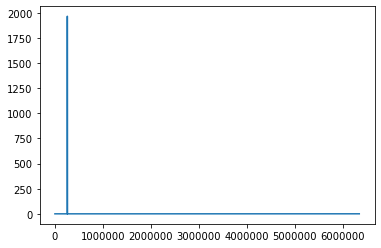

In [6]:
plt.plot(df['eurusd']['close_bid'])

In [25]:
df['eurusd']['close_bid'].describe()

count    6.342850e+06
mean     1.231638e+00
std      7.948462e-01
min     -1.000000e-04
25%      1.128940e+00
50%      1.243700e+00
75%      1.339200e+00
max      1.965000e+03
Name: close_bid, dtype: float64

- gbpusd

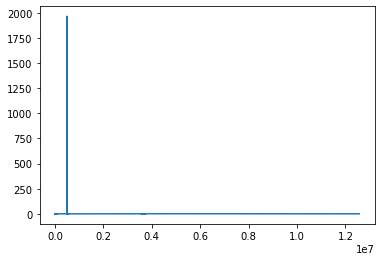

In [8]:
plt.plot(df['gbpusd']['close_bid'])

In [9]:
df['gbpusd']['close_bid'].describe()

count    1.257095e+07
mean     1.410165e+00
std      6.099714e-01
min     -1.000000e-04
25%      1.236200e+00
50%      1.369180e+00
75%      1.575800e+00
max      1.965000e+03
Name: close_bid, dtype: float64

- audusd

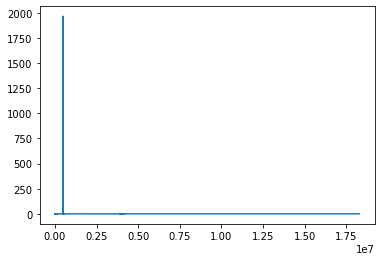

In [10]:
plt.plot(df['audusd']['close_bid'])

In [11]:
df['audusd']['close_bid'].describe()

count    1.827830e+07
mean     1.226367e+00
std      5.792756e-01
min     -1.000000e-04
25%      9.194000e-01
50%      1.253100e+00
75%      1.488500e+00
max      1.965000e+03
Name: close_bid, dtype: float64

#### Remove rows with errorous values

In [27]:
for key in df.keys():
    max_idx = pd.Series.idxmax(df[key]['close_bid'])
    min_idx = pd.Series.idxmin(df[key]['close_bid'])
    df[key]['close_bid'].drop(max_idx, inplace=True)
    df[key]['close_bid'].drop(min_idx, inplace=True)

### Plot data again

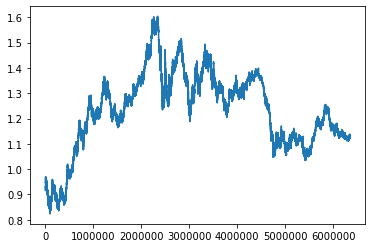

In [28]:
plt.plot(df['eurusd']['close_bid'])

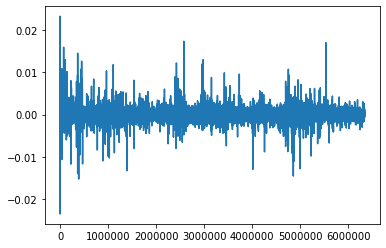

In [47]:
plt.plot(df['eurusd']['log_return'])

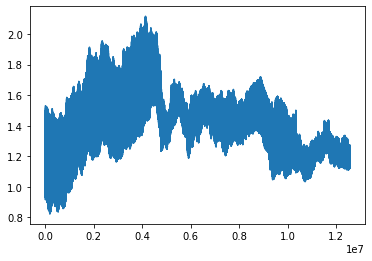

In [14]:
plt.plot(df['gbpusd']['close_bid'])

In [ ]:
df['gbpusd']['close_bid'].describe()

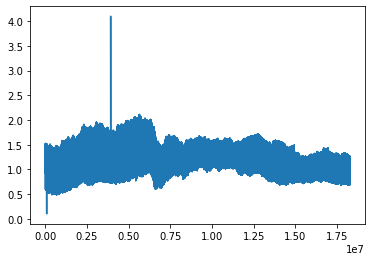

In [15]:
plt.plot(df['audusd']['close_bid'])

# 1. Run unit root tests

- Source: https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/

In [16]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [30]:
df['eurusd']['log_return'] = np.log(df['eurusd']['close_bid']).diff()

In [29]:
df['eurusd']['close_bid'].describe()

count    6.342848e+06
mean     1.231329e+00
std      1.542414e-01
min      8.233000e-01
25%      1.128940e+00
50%      1.243700e+00
75%      1.339200e+00
max      1.603800e+00
Name: close_bid, dtype: float64

In [36]:
df['eurusd'].head()

,timestamp,close_bid,log_return
0,20000530 173500,0.9305,NaN
1,20000530 173800,0.9303,-0.000215
2,20000530 174300,0.9300,-0.000323
3,20000530 174400,0.9297,-0.000323
4,20000530 182900,0.9299,0.000215


In [43]:
df['eurusd'].dropna(axis=0, inplace=True)

In [44]:
df['eurusd'].head()

,timestamp,close_bid,log_return
1,20000530 173800,0.9303,-0.000215
2,20000530 174300,0.9300,-0.000323
3,20000530 174400,0.9297,-0.000323
4,20000530 182900,0.9299,0.000215
5,20000530 183700,0.9300,0.000108


In [45]:
df['eurusd'].to_csv('eurusd.csv')